# **MOVIE_REVENUE_PREDICTOR**
### **`Background`**

`Royal Empire Company` recently announced that the company was planning on launching new subsidiary companies with an aim of diversifying its porfolio. Among the companies to be launched is a production company, `Royal Empire Movie Studio`, which will involve the production and marketing of original and franchise movies. Commissioned by the company, this projects aims to try and predict movie revenues based on several movie factors. The insights will help stakeholders make informed data-driven decisions on the starting and running of the movie studio.

## **Business Understanding**
### Business Overview
The film industry incorporates all of the technological and commercial aspects of filmmaking. This includes production companies, studios, cinematography, distribution, and a lot more. Some of the most important aspects in the industry include;

- Production: This involves the creative process of making films, including screenwriting, pre-production, filming, and post-production.

- Marketing: This involves activities aimed at promoting a movie to attract audiences and maximize revenue. It involves strategies like market research, target audience identification, and leveraging both traditional and digital media.

- Distribution: This covers the methods used to get films to audiences, such as cinemas, television, online platforms, and other media outlets. 

- Monetizing: This involves the various methods used to generate revenue from films. These strategies include traditional avenues like theatrical releases, DVD sales, and television licensing, as well as newer digital approaches such as streaming and online video-on-demand (VOD) platforms.

### Project Overview
Despite the film industry being a multi-billion dollar market, predicting a movie's financial success has remained a challenge. This project will be exploring whether a machine learning model can estimate a film's box office revenue based on its features such as budget, genre, cast, director and audience ratings.

This project also serves as an opportunity to practice Object-Oriented Programming (OOP) in data science workflows, improving modularity, readability, and scalability of the ML pipeline.

### Project Objective
- The primary goal of the project is to assist the company's production teams, investors, and other stakeholders in making data-driven decisions when evaluating new projects.

### Stakeholders
- Studio executives: Make key decisions regarding project development, financing, and distribution. 

- Investors: Provide the financial backing for the film. 

### Techniques Used in the Project
The project will be applying the folowing to uncover patterns behind movie performance;
- data preprocessing

- feature engineering

- supervised learning techniques


## **Data Understanding**
### Data Source
To help answer our question, we will be using a dataset generated from The Movie Database (TMDB) API that we downloaded from [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).

Under the file path `Data/RawData/` you can find the raw data files that contain information about several movies with additional information about their crews and cast members. The 2 datasets, namely the `tmdb_500_movies.csv` and the `tmdb_5000_credits.csv` contain features such as movie budgets, revenue, title, genre, popularity, release date, votes, crew, cast among others.

### Why is the data suitable for the project?
The dataset contains rich, diverse data points such as film budget, financial success, genre, popularity, and votes that can be used to train algorithms to predict various outcomes. 

### Initial Analysis
In this section, we are importing all the dependencies/libraries that we will be using in the project, loading the dataset and analyzing it to understand it's structure as well as checking if the quality of the data is good. This is important as without proper data quality tests, businesses risk making decisions based on flawed or incomplete information, which could lead to business failure, etc. 

#### Importing Dependencies
For efficience and accessibility, we will be using; 
- Pandas

- NumPy

- Matplotlib

- Seaborn

- Scikit-Learn 

In the first code, we are importing the libraries named above. 

In [1]:
# Import dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datetime import datetime
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Loading the dataset and parsing the dataset.
As mentioned above, we will be using this project as an opportunity to practice our OOP.

In the the first block of code we are building a class that loads the movie datasets into the notebook, merges them so that we only deal with one dataset. This is important as it will make it easy to keep up with the data and all the cleansing will be done all at once, avoiding redundant codes.

The class will also perform qualitatitive and quantitative analysis, helping us understand the structure and contents of the datasets. The analysis will include finding the shape, returning the structure information and statistical summary of the data, it will also check for missing values and duplicated records.

In [2]:
# Create a class that loads data, previews it, and carries out qualitative and quantitative analysis on it.

class MovieDataLoader:
    def __init__(self, movie_path, credits_path):
        self.movie_path = movie_path
        self.credits_path = credits_path
        self.movies_df = None
        self.credits_df = None
        self.merged_df = None

    # Loads the dataset into the notebook using Pandas .read_csv() method.
    def load_data(self): 
        try:
            self.movies_df = pd.read_csv(self.movie_path)
            self.credits_df = pd.read_csv(self.credits_path)
            print("Data loaded successfully.")
        except Exception as e:
            print(f"Error loading files: {e}")

    # Merges the datasets into one using Pandas .merge() method.
    def merge_data(self): 
        if self.movies_df is not None and self.credits_df is not None:
            self.merged_df = pd.merge(self.movies_df, self.credits_df, left_on='id', right_on='movie_id')
            print("Data merged successfully.")
        else:
            print("Load data before merging.")

    # Previews the dataset by returning the first 5 rows. Uses the .head() method.
    def preview_data(self, n=5):
        if self.merged_df is not None:
            return self.merged_df.head(n)
        else:
            print("Data not merged yet.")

    # Retrieves the shape of the dataset using the .shape method.
    def get_shape(self):
        if self.merged_df is not None:
            return self.merged_df.shape
        else:
            return "Data not available yet."
        
    # Returns the dataset's consice summary, helps understand the structure of the data.
    def get_info(self):
        if self.merged_df is not None:
            return self.merged_df.info()
        else:
            return "Load and merge data first."

    # Checks for missing values.
    def check_missing(self):
        if self.merged_df is not None:
            return self.merged_df.isnull().sum()
        else:
            return "Load and merge data first."
        
    # Checks for duplicate records.
    def check_duplicates(self):
        if self.merged_df is not None:
            return self.merged_df.duplicated().sum()
        else:
            return "Load and merge data first."
        
    # Returns the statistical summary of the dataset.    
    def get_stats_summary(self):
        if self.merged_df is not None:
            return self.merged_df.describe()
        else:
            return "Load and merge data first."

In [3]:
# Load the datasets and merge them.
movies_info = MovieDataLoader("../Data/RawData/tmdb_5000_movies.csv", "../Data/RawData/tmdb_5000_credits.csv")

movies_info.load_data()
movies_info.merge_data()

# Preview results.
print(movies_info.get_shape())
movies_info.preview_data()

Data loaded successfully.
Data merged successfully.
(4803, 24)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


The dataset contains structured data stored in 4803 rows and 24 columns. The columns contain values stored as floats, integers and objects. From the preview, we notice that some columns contain nested structures and some contain the same information.

Next we are getting the summarized info on the dataset.

In [4]:
# Get dataset structure info.
movies_info.get_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

The structure of the dataset is as follows;
- Shape: 4803, 24

- Datatypes: 3 floats, 5 integers and 16 objects

- Null values: homepage, overview, release_date, runtime, and tagline columns contain null values.

- Wrong data-type: release_date is stored as objects instead of datetime. Also, we saw that some columns contain nested structures but are stored as objects.

Next we are going to look at the numer of missing values in the columns and if we have any duplicated records.

In [5]:
# Check missing values and duplicates.
print(movies_info.check_missing())
movies_info.check_duplicates()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64


0

The data has no duplicated records but has missing values in several columns but mostly in 2 columns.

In the next code we are looking at the quantitative summary of the dataset including the numerical data's measures of central tendencies, measures of spread and some aggregate functions.

In [6]:
movies_info.get_stats_summary()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


Through this summary, we found that we have records in the dataset that contain placeholders. For example, the budget, runtime, and revenue columns `min` is 0, which logically is impossible. The other columns also contain the same, adding to the theory that th number 0 was used as a placeholder.

### Data Quality Issues.
Upon exloring the dataset, we found that the data contains several data quality issues, they include:
- Incomplete records: The data contains columns that have missing values and others that contain placeholders.

- Inaccurate records: There is a column that contains values stored in the wrong data type.

- Irrelevant columns: The dataset has 24 columns, most of which are not relevant to the project, irrelevant columns can negatively impact a prediction model. They can decrease accuracy, and make the model harder to interpret. They also add noise to the data, potentially leading to overfitting.

- Duplicated columns: The dataset has 3 columns that have the same content, namely `original_title`, `title_x`, and `title_y`.

## **Data Preparation**
In the previous section, we found that the data has a couple of data quality issues including incomplete records, irrelevant to our project columns etc. In this section we will be preparing the data for analysis. This process will include;
- Data cleaning

- Feature engineering

- Data conversion

We will be creating a class that will contain methods that will:
- **clean numeric columns**: During our data Understandiong we found that almost all of the numerical columns have placeholders of 0. This method will convert them to numeric and filter out rows with 0 in budget and revenue. This is because this will have negative impacts on our prediction model. For the rest of the numerical data, the method will fill them with either the median or mean. 

- **Parse fields**: We also found some columns had JSON-like content, that is, they had nested structures. This method will extract a list of values from a column that looks like JSON but is actually stored as a string.

- **Extract values**: The *parse fields* method will be used in these methods to extract values from the various columns containing information in nested structures.

- **Convert data types**: The initial analysis uncovered that some columns were stored as wrong data types, this method will convert the column to the right data type and engineer new features from the converted data.

- **Compute Return On Investment**: This method will engineer a new feature containing the ROI on the respective films, creating a new column.

- **Filter data**: Finally, we identified some irrelevant columns, in this method we will be filtering them out to remain with the data relevant to our model later in the project.

In [7]:
# # Create a class that prepares the data for analysis.
class MoviePreprocessor:
    def __init__(self, df):
        self.df = df.copy()
        self.cleaned_df = None

    def clean_numeric_columns(self):
        print("Cleaning numeric columns...")

        # Convert columns to numeric
        numeric_cols = ['budget', 'revenue', 'runtime', 'vote_count', 'popularity']
        for col in numeric_cols:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

        # Filter out rows with placeholder 0s in budget or revenue
        self.df = self.df[(self.df['budget'] > 0) & (self.df['revenue'] > 0)]

        # Handle missing values (optional: could drop or fill)
        self.df['runtime'].fillna(self.df['runtime'].median(), inplace=True)
        self.df['vote_count'].fillna(0, inplace=True)
        self.df['popularity'].fillna(self.df['popularity'].mean(), inplace=True)

        print("Numeric columns cleaned.")

    def _parse_json_field(self, field, key):
        """Parse a JSON-like column and extract a list of specified keys (e.g., genres)."""
        return [i[key] for i in ast.literal_eval(field)] if field != '[]' else []

    def extract_genres(self):
        self.df['genres'] = self.df['genres'].apply(lambda x: ', '.join(self._parse_json_field(x, 'name')))

    def extract_director(self):
        def get_director(crew_data):
            for person in ast.literal_eval(crew_data):
                if person['job'] == 'Director':
                    return person['name']
            return None
        self.df['director'] = self.df['crew'].apply(get_director)

    def extract_top_cast(self, top_n=3):
        def get_cast(cast_data):
            return ', '.join([person['name'] for person in ast.literal_eval(cast_data)[:top_n]])
        self.df['top_cast'] = self.df['cast'].apply(get_cast)

    def convert_release_date(self):
        self.df['release_date'] = pd.to_datetime(self.df['release_date'], errors='coerce')
        self.df['release_year'] = self.df['release_date'].dt.year
        self.df['release_month'] = self.df['release_date'].dt.month

    def compute_roi(self):
        self.df = self.df[(self.df['budget'] > 0) & (self.df['revenue'] > 0)]
        self.df['roi'] = (self.df['revenue'] - self.df['budget']) / self.df['budget']

    def drop_unused_columns(self):
        keep = ['original_title', 'budget', 'revenue', 'genres', 'release_year',
                'release_month', 'runtime', 'vote_average', 'vote_count',
                'popularity', 'top_cast', 'director', 'roi']
        self.cleaned_df = self.df[keep].dropna()

    def run_all(self):
        print("Cleaning & transforming data...")
        self.clean_numeric_columns()
        self.extract_genres()
        self.extract_director()
        self.extract_top_cast()
        self.convert_release_date()
        self.compute_roi()
        self.drop_unused_columns()
        print("Preprocessing complete.")
        return self.cleaned_df

In [8]:
# Clean the data.
preprocessor = MoviePreprocessor(movies_info.merged_df)
clean_df = preprocessor.run_all()

# Preview the cleaned data.
clean_df.head()

Cleaning & transforming data...
Cleaning numeric columns...
Numeric columns cleaned.
Preprocessing complete.


,original_title,budget,revenue,genres,release_year,release_month,runtime,vote_average,vote_count,popularity,top_cast,director,roi
0,Avatar,237000000,2787965087,"Action, Adventure, Fantasy, Science Fiction",2009,12,162.0,7.2,11800,150.437577,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron,10.763566
1,Pirates of the Caribbean: At World's End,300000000,961000000,"Adventure, Fantasy, Action",2007,5,169.0,6.9,4500,139.082615,"Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski,2.203333
2,Spectre,245000000,880674609,"Action, Adventure, Crime",2015,10,148.0,6.3,4466,107.376788,"Daniel Craig, Christoph Waltz, Léa Seydoux",Sam Mendes,2.594590
3,The Dark Knight Rises,250000000,1084939099,"Action, Crime, Drama, Thriller",2012,7,165.0,7.6,9106,112.312950,"Christian Bale, Michael Caine, Gary Oldman",Christopher Nolan,3.339756
4,John Carter,260000000,284139100,"Action, Adventure, Science Fiction",2012,3,132.0,6.1,2124,43.926995,"Taylor Kitsch, Lynn Collins, Samantha Morton",Andrew Stanton,0.092843


Now, our data is cleaned and prepared for modeling.

## **Exploratory Data Analysis (EDA)**
In this section, we will be doing exploratory data analysis, this is crucial for our project as it helps us understand the shape and pattern of our data. It also helps us uncover patterns, or biases in our data.

Additionally, it will help us identify outliers, which could be detrimental to our model or preprocessing as some methods do not do well with outliers, knowing if a feature has one prior will help us choose the most suitable preprocessing method. 

We will be using seaborn and matplotlib python modules for visualization.

In the next code we are going to create an EDA class, it will have methods that will help us explore our cleaned data further.

In [9]:
# Create EDA class.

class MovieEDA:
    plt.style.use('dark_background') # -> Set the plot style.

    def __init__(self, data, figsize=(10, 6)):
        self.data = data
        self.figsize = figsize

    def revenue_distribution(self): # -> Plot revenue distribution.
        plt.figure(figsize=self.figsize)
        sns.histplot(self.data['revenue'], bins=30, kde=True, color='teal')
        plt.title('Revenue Distribution')
        plt.xlabel('Revenue')
        return plt.show()

    def revenue_vs_budget(self): # -> Plot revenue vs budget.
        plt.figure(figsize=self.figsize)
        sns.scatterplot(data=self.data, x='budget', y='revenue', hue='release_year', palette='cool')
        plt.title('Revenue vs Budget')
        plt.xlabel('Budget')
        plt.ylabel('Revenue')
        return plt.show()

    def top_directors(self, n=10): # -> Plot top directors by average return on investment (ROI).
        top_directors = self.data.groupby('director')['roi'].mean().sort_values(ascending=False).head(n)
        plt.figure(figsize=self.figsize)
        top_directors.plot(kind='barh', color='darkorange')
        plt.title(f'Top {n} Directors by Average ROI')
        plt.xlabel('ROI')
        plt.gca().invert_yaxis()
        return plt.show()

    def correlation_matrix(self): # -> Plot feature correlation.
        plt.figure(figsize=self.figsize)
        sns.heatmap(self.data.corr(), cmap='Purples', annot=True, fmt=".2f")
        plt.title("Correlation Matrix")
        return plt.show()

    def multicollinearity(self, threshold=0.75): # -> Identify which features have the highest correlation.
        corr_matrix = self.data.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        result = upper.stack().reset_index()
        result.columns = ['Feature 1', 'Feature 2', 'Correlation']
        return result[result['Correlation'] > threshold]

    def avg_roi_by_genre(self, n=10): # -> Plot average ROI by genre.
        genre_df = self.data.copy()
        genre_df['genre_split'] = genre_df['genres'].str.split(', ')
        genre_exploded = genre_df.explode('genre_split')
        top_genres = genre_exploded.groupby('genre_split')['roi'].mean().sort_values(ascending=False).head(n)
        
        plt.figure(figsize=self.figsize)
        top_genres.plot(kind='barh', color='mediumseagreen')
        plt.title(f'Top {n} Genres by Average ROI')
        plt.xlabel('ROI')
        plt.gca().invert_yaxis()
        return plt.show()

    def vote_score_vs_revenue(self): # -> Plot vote_score vs revenue.
        plt.figure(figsize=self.figsize)
        sns.scatterplot(data=self.data, x='vote_average', y='revenue', hue='release_year', palette='viridis')
        plt.title('Vote Score vs Revenue')
        return plt.show()

    def release_trend(self): # -> Plot release trends.
        yearly_stats = self.data.groupby('release_year').agg({'revenue': 'mean', 'budget': 'mean'}).dropna()
        plt.figure(figsize=self.figsize)
        sns.lineplot(data=yearly_stats, palette='mako')
        plt.title('Average Revenue & Budget Over Years')
        return plt.show()

### Revenue Distribution
In the next code we will be instantiating the revenue_distribution(), this will help us identify how the feature is distributed, or what kind of distribution does it have.

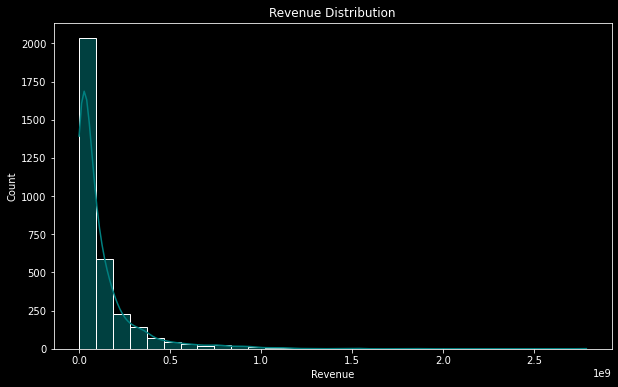

In [10]:
# Instatiate the class.
eda = MovieEDA(clean_df)

# Plot revenue distribution.
eda.revenue_distribution()

The revenue columns has an exponential distribution, with most of the values being 0, the placeolder. The distribution also has a lond tail, hinting that there may be outliers.

### Revenue vs Budget
This code seeks to see how films performed financially against their production budgets and to uncover if the production budget has any influence on the films financial success.

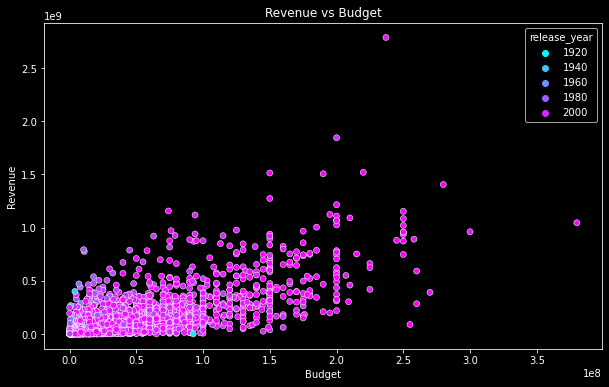

In [11]:
# Plot revenue vs budget
eda.revenue_vs_budget()

In the plot above the first thing we notice is that we have outliers, and the two features do not have the same scales. We also notice that the dots are clustered at the bottom of the plot, this may be indication that high production budgets may not necessarily mean higher financial success, albeit we have some films that have performed well despite their low budgets.

### Average ROI by Genre
Here we are trying to figure out if there is any pattern between returns on investment and movie genres. This is crucial as it will help us understand if the movie genre has any influence on the revenue.

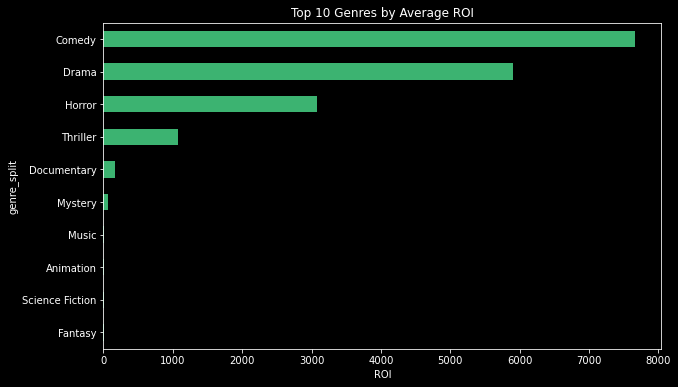

In [12]:
eda.avg_roi_by_genre()

According to the plot above, there is a strong relationship between comedy films and ROIs, followed closely by drama, horror and thriller. 

### Top Directors by ROI.
Directors play a very crucial role in film development, this plot seeks to find directors with the highest average ROI.

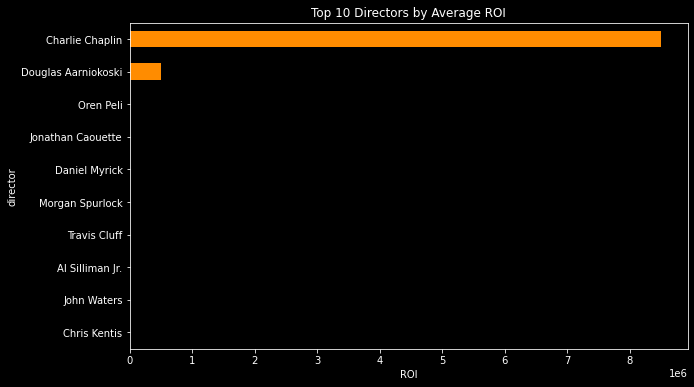

In [13]:
# Plot top directors by average ROI.
eda.top_directors()

Charlie Chaplin is the director with the highest ROI average at around 8.5 million dollars, Douglas Aarniokoski follows behind at around 0.5 million dollars in ROI.

### Vote_score vs Revenue
Here we are trying to understand the relationship between vote_score and revenue, does vote_score influence the films financial success?

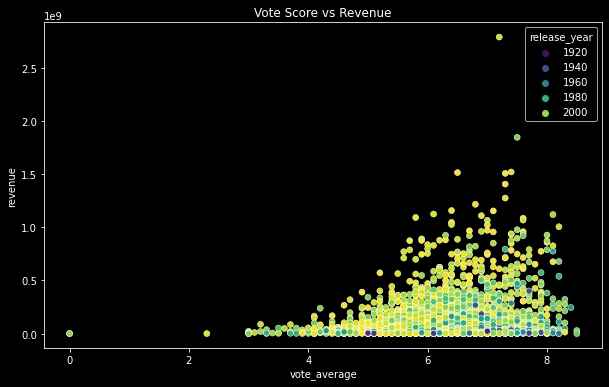

In [14]:
# Plot vote_score vs revenue.
eda.vote_score_vs_revenue()

There are a lot of films with average votes between 4 and 8, and they performed moderately. However, their financial performance may have been underplayed by the outliers present in the dataset causing thme to seem moderate.

### Average Revenue and Budget Over Years
In this section we'll be checking the distribution of production budgets and revenues over the years.

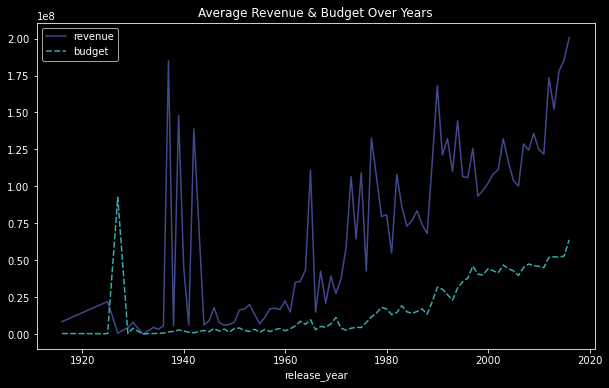

In [15]:
# Plot release trend.
eda.release_trend()

In some of the seasons between the 1930s and 1950s the films were doing really well despite the low production budgets they were developed on. As the years went on, bith the production budgets
and the revenue have been increasing showing stability and innovation.

### Correlation Matrix and Checking Multicollinearity
Here we will be checking if the features are correlated to each other. 

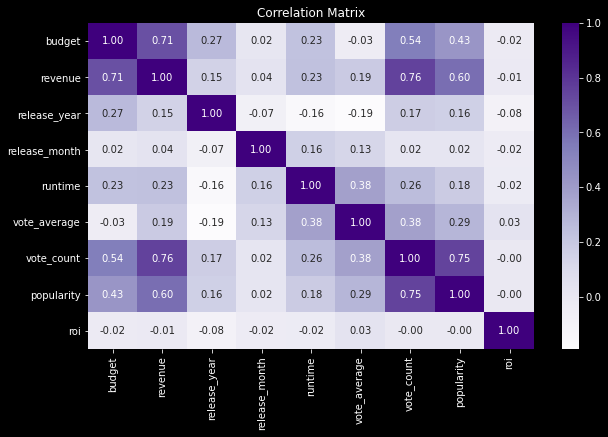

In [16]:
eda.correlation_matrix()

In [17]:
eda.multicollinearity()

,Feature 1,Feature 2,Correlation
12,revenue,vote_count,0.756144


In the last two codes, revenue and vote_count have the highest correlation, but since we are actually predicting the revenue, there is no need to drop either one of them. The other features that are correlated, are just moderate and they pose no threat to the stability of our model.

## **Data Preprocessing**
In this section we will be preprocessiong our data for training and testing purposes. This process will involve:
- Encoding

- Features selection

- train/test splitting.

This part is crucial as it ensures the data is in a suitable format for tarining and evaluation.

### Encoding Categorical Data.
Due to the nature of our categorical data, nominal, we will be using OneHotEncoding to encode the genre and directors columns.

In [18]:
# Create function decoding 
class Encoder:
    
    def __init__(self, df):
        self.df = df

    def encode_top_genres(self, df, column='genres', top_n=5):
        # Split genres
        genre_df = self.df.copy()
        genre_df['genre_list'] = genre_df[column].str.split(', ')

        # Explode to get one genre per row
        exploded = genre_df.explode('genre_list')

        # Count frequency
        top_genres = exploded['genre_list'].value_counts().nlargest(top_n).index.tolist()

        # Create binary flags
        for genre in top_genres:
           self.df[f'genre_{genre}'] = self.df[column].apply(lambda x: 1 if genre in x else 0)

        return df
    
    def encode_top_directors(self, df, top_n=5):
        top_directors = self.df['director'].value_counts().nlargest(top_n).index.tolist()
        self.df['director_encoded'] = self.df['director'].apply(lambda x: x if x in top_directors else 'Other')
        return pd.get_dummies(df, columns=['director_encoded'], prefix='dir')

#### Encoding Genres
Here we are encoding drama, comedy, thriller, action and adventure genres for our model.

In [19]:
# Instantiate the Encoder class.
enc = Encoder(clean_df)

# Encode top genres.
clean_df = enc.encode_top_genres(clean_df)

# Preview dataset.
clean_df.head()

,original_title,budget,revenue,genres,release_year,release_month,runtime,vote_average,vote_count,popularity,top_cast,director,roi,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Adventure
0,Avatar,237000000,2787965087,"Action, Adventure, Fantasy, Science Fiction",2009,12,162.0,7.2,11800,150.437577,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron,10.763566,0,0,0,1,1
1,Pirates of the Caribbean: At World's End,300000000,961000000,"Adventure, Fantasy, Action",2007,5,169.0,6.9,4500,139.082615,"Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski,2.203333,0,0,0,1,1
2,Spectre,245000000,880674609,"Action, Adventure, Crime",2015,10,148.0,6.3,4466,107.376788,"Daniel Craig, Christoph Waltz, Léa Seydoux",Sam Mendes,2.594590,0,0,0,1,1
3,The Dark Knight Rises,250000000,1084939099,"Action, Crime, Drama, Thriller",2012,7,165.0,7.6,9106,112.312950,"Christian Bale, Michael Caine, Gary Oldman",Christopher Nolan,3.339756,1,0,1,1,0
4,John Carter,260000000,284139100,"Action, Adventure, Science Fiction",2012,3,132.0,6.1,2124,43.926995,"Taylor Kitsch, Lynn Collins, Samantha Morton",Andrew Stanton,0.092843,0,0,0,1,1


#### Encoding Directors
As the dataset contains more than 4,000 records, we are only encoding the top 5 directors and the rest as others.

In [20]:
# Encode top directors.
clean_df = enc.encode_top_directors(clean_df)

# Preview dataset.
clean_df.head()

,original_title,budget,revenue,genres,release_year,release_month,runtime,vote_average,vote_count,popularity,...,genre_Comedy,genre_Thriller,genre_Action,genre_Adventure,dir_Clint Eastwood,dir_Martin Scorsese,dir_Other,dir_Ridley Scott,dir_Robert Rodriguez,dir_Steven Spielberg
0,Avatar,237000000,2787965087,"Action, Adventure, Fantasy, Science Fiction",2009,12,162.0,7.2,11800,150.437577,...,0,0,1,1,0,0,1,0,0,0
1,Pirates of the Caribbean: At World's End,300000000,961000000,"Adventure, Fantasy, Action",2007,5,169.0,6.9,4500,139.082615,...,0,0,1,1,0,0,1,0,0,0
2,Spectre,245000000,880674609,"Action, Adventure, Crime",2015,10,148.0,6.3,4466,107.376788,...,0,0,1,1,0,0,1,0,0,0
3,The Dark Knight Rises,250000000,1084939099,"Action, Crime, Drama, Thriller",2012,7,165.0,7.6,9106,112.312950,...,0,1,1,0,0,0,1,0,0,0
4,John Carter,260000000,284139100,"Action, Adventure, Science Fiction",2012,3,132.0,6.1,2124,43.926995,...,0,0,1,1,0,0,1,0,0,0


### Feature Selection
First we are going to slice the data to only have the columns relevant for our analysis. We will be using the following columns;

- **vote_count, vote_average, popularity** - These columns reflect audience enjoyment and popularity of the movie.

- **metascore** - reflects critic reception.

- **budget** - this is the amount used in developing the movie 

- **roi** - this is the return on investment

- **runtime** - gives clues about genre tendencies

- **genre, directors** - to explore how genres and directors affect financial success

- **release_year, release_month** - to explore if seasons films are released in have any effect on its financial success.

These columns have also been chosen because they are numerical or are categorical and have been encoded.

In [21]:
# Select the features I want.
features = [
    'budget', 'runtime', 'vote_average', 'vote_count',
    'popularity', 'roi', 'release_year', 'release_month',
    'genre_Action', 'genre_Drama', 'genre_Comedy', 'genre_Thriller', 'genre_Adventure',
    'dir_Clint Eastwood', 'dir_Martin Scorsese', 'dir_Steven Spielberg', 'dir_Other', 'dir_Ridley Scott', 'dir_Robert Rodriguez'
]

# Store them in X, y variables.
X = clean_df[features]
y = clean_df['revenue']

### Train/Test Split.
This is an essential step for our model as the test dataset will help us calsulate how accurate the model is.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## **Predictions**
Here we will be using scikit-learn's linear model to perform linear regression on the dataset.

### Training the Model
This will involve modeling and remodeling the data to perfectly fit and predict the revenue. We will be using `statsmodel` for our training.

#### Model_1

In [23]:
# Preparing the x data for modeling.
X_baseline = X_train['vote_count'].copy()

# Model the data.
model = sm.OLS(y_train, sm.add_constant(X_baseline))
results = model.fit()

In [24]:
# Evaluate the model (R-squared, F-stats)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     3601.
Date:                Fri, 04 Jul 2025   Prob (F-statistic):               0.00
Time:                        05:57:46   Log-Likelihood:                -51516.
No. Observations:                2581   AIC:                         1.030e+05
Df Residuals:                    2579   BIC:                         1.030e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.635e+07    2.7e+06      9.743      0.000     2.1e+07    3.16e+07
vote_count  9.461e+04   1576.602     60.008      0.000    9.15e+04    9.77e+04
==============================================================================
Omnibus:                      888.078   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10928.612
Skew:                           1.270   Prob(JB):                         0.00
Kurtosis:                      12.756   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model performance:
- Our baseline model explains about 58% of the variance and is statistically significant.

-  The features are also statistically significant at an alpha of 0.05.

- For every unit change in `vote_count`, the revenue increases by about $94,600.

#### Model 2
In this next session, we will be adding on more highly correlated features to our model. This is so as to improve the model's performance.

In [25]:
# Add more features to out X_train
X_related = X_train[['budget', 'popularity', 'vote_count']].copy()

# Model our second model.
model1 = sm.OLS(y_train, sm.add_constant(X_related))
results1 = model1.fit()

In [26]:
# Evaluate the model (R-squared, F-stats)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     2144.
Date:                Fri, 04 Jul 2025   Prob (F-statistic):               0.00
Time:                        05:57:46   Log-Likelihood:                -51028.
No. Observations:                2581   AIC:                         1.021e+05
Df Residuals:                    2577   BIC:                         1.021e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.825e+07   2.63e+06     -6.943      0.000   -2.34e+07   -1.31e+07
budget         1.6851      0.050     33.448      0.000       1.586       1.784
popularity   4.74e+05   7.35e+04      6.444      0.000     3.3e+05    6.18e+05
vote_count  5.747e+04   2089.082     27.511      0.000    5.34e+04    6.16e+04
==============================================================================
Omnibus:                      846.622   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10001.988
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                      12.337   Cond. No.                     8.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model Performance:
- Compared to our first model, this model performs better as it explains about 72% of the variance.

- All the features are statistically significant.

- All the coefficients are positive, except the `const`.


#### Model 3
At the moment, our model has `budget`, `popularity` and `vote_count` features, but other elements such as release_month, genre, directors, writers and critical reception are stronger drivers of long-term financial performance as well. However, since these features do not have a correlation to our target variable.

In the next section we will be modeling with the features as they are before we decide to do anyting else.

In [27]:
# Preparing data for modeling
X_influence = X_train[['budget', 'popularity', 'vote_count', 'release_month', 'runtime', 'vote_average']].copy()

# Model our third model.
model2 = sm.OLS(y_train, sm.add_constant(X_influence))
results2 = model2.fit()

In [28]:
# Evaluate the model
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1073.
Date:                Fri, 04 Jul 2025   Prob (F-statistic):               0.00
Time:                        05:57:46   Log-Likelihood:                -51027.
No. Observations:                2581   AIC:                         1.021e+05
Df Residuals:                    2574   BIC:                         1.021e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.11e+07   1.62e+07     -1.306      0.192   -5.28e+07    1.06e+07
budget            1.6973      0.054     31.144      0.000       1.590       1.804
popularity     4.715e+05   7.36e+04      6.409      0.000    3.27e+05    6.16e+05
vote_count     5.739e+04   2246.166     25.548      0.000     5.3e+04    6.18e+04
release_month  9.465e+05   5.57e+05      1.701      0.089   -1.45e+05    2.04e+06
runtime       -9.774e+04   1.01e+05     -0.971      0.331   -2.95e+05    9.95e+04
vote_average   1.069e+06   2.66e+06      0.402      0.688   -4.15e+06    6.28e+06
==============================================================================
Omnibus:                      855.578   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10153.271
Skew:                           1.221   Prob(JB):                         0.00
Kurtosis:                      12.405   Cond. No.                     5.21e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

model performance:
- Compared to model 2, the model performance has reduced. The previous model explained about 72% of the variance, in the current it explains 71%.

- All the added features are statistically insignificant. Also, the intercept, which previously was statistically significant, is now insignificant.

- Despite being statistically insignificant, 2 out of the 3 newly added features have a positive effect on the target. 

#### Model 4
As mentoned above, the last three added features are barely correlated to the target variable, here, we are going to inspect them further and identify the underlying issue, and try to fix them to improve the model's performance.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(X_influence.values, i) for i in range(X_influence.shape[1])]
vif_data["feature"] = X_influence.columns

vif_data

,VIF,feature
0,2.812504,budget
1,3.587948,popularity
2,3.874876,vote_count
3,5.429040,release_month
4,35.417717,runtime
5,35.140848,vote_average


<AxesSubplot:>

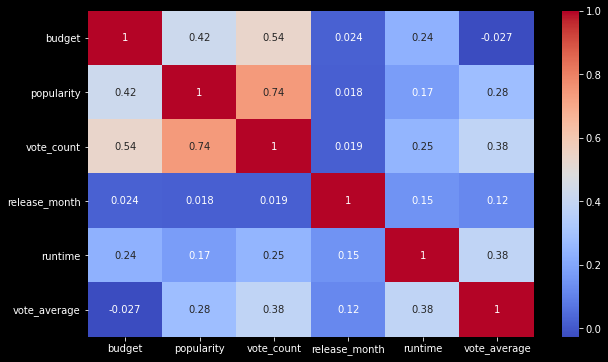

In [ ]:
corr_matrix = X_influence.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='green')

In [32]:
from statsmodels.api import OLS, add_constant

# Let's say the high VIF feature is 'X1'
y = X_influence['runtime'].copy()
X_others = X_influence.drop(columns=['runtime']).copy()
X_others = add_constant(X_others)

model = OLS(y, X_others).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                runtime   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     143.7
Date:                Fri, 04 Jul 2025   Prob (F-statistic):          8.52e-135
Time:                        06:20:42   Log-Likelihood:                -11161.
No. Observations:                2581   AIC:                         2.233e+04
Df Residuals:                    2575   BIC:                         2.237e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            41.0203      3.060     13.407

In [33]:
# Let's say the high VIF feature is 'X1'
y = X_influence['vote_average'].copy()
X_others = X_influence.drop(columns=['vote_average']).copy()
X_others = add_constant(X_others)

model = OLS(y, X_others).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     266.0
Date:                Fri, 04 Jul 2025   Prob (F-statistic):          1.07e-229
Time:                        06:22:28   Log-Likelihood:                -2709.6
No. Observations:                2581   AIC:                             5431.
Df Residuals:                    2575   BIC:                             5466.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.6529      0.077     60.453

"While the variable popularity initially appeared to be a useful predictor, further analysis revealed it to be a source of high multicollinearity, with VIF values exceeding 30. Additionally, its contribution to the model was statistically insignificant, with consistently high p-values. To improve model stability and interpretability, we excluded popularity from the final model."

In [34]:
X_reduced = X_influence.drop(columns= ['popularity']).copy()

model3 = sm.OLS(y_train, sm.add_constant(X_reduced))
results3 = model3.fit()

In [36]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1259.
Date:                Fri, 04 Jul 2025   Prob (F-statistic):               0.00
Time:                        06:27:45   Log-Likelihood:                -51047.
No. Observations:                2581   AIC:                         1.021e+05
Df Residuals:                    2575   BIC:                         1.021e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.695e+07   1.63e+07     -1.042      0.298   -4.88e+07     1.5e+07
budget            1.7148      0.055     31.261      0.000       1.607       1.822
vote_count     6.632e+04   1775.361     37.353      0.000    6.28e+04    6.98e+04
release_month  9.704e+05   5.61e+05      1.730      0.084   -1.29e+05    2.07e+06
runtime       -1.141e+05   1.01e+05     -1.126      0.260   -3.13e+05    8.46e+04
vote_average   1.364e+06   2.68e+06      0.509      0.611   -3.89e+06    6.62e+06
==============================================================================
Omnibus:                      995.933   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12823.352
Skew:                           1.458   Prob(JB):                         0.00
Kurtosis:                      13.523   Cond. No.                     5.21e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_influence), columns=X_influence.columns)

X_scaled.head()


,budget,popularity,vote_count,release_month,runtime,vote_average
0,-0.226307,-0.499630,-0.525038,0.609466,0.939688,-0.020297
1,-0.734106,-0.523922,-0.566936,-1.776174,-0.850477,-0.255220
2,1.204762,-0.057443,-0.284299,1.205876,0.746157,0.567010
3,-0.477898,-0.503503,-0.547762,-1.477969,-0.076352,0.214625
4,3.697593,1.710916,4.704472,0.907671,1.568665,0.684471


In [45]:
y_train = y_train.reset_index(drop= True)
y_train.head()

0      31148328
1      16856124
2     143049560
3       5728213
4    1108561013
Name: revenue, dtype: int64

In [46]:
model_scaled = sm.OLS(y_train, sm.add_constant(X_scaled)).fit()
print(model_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1073.
Date:                Fri, 04 Jul 2025   Prob (F-statistic):               0.00
Time:                        06:36:29   Log-Likelihood:                -51027.
No. Observations:                2581   AIC:                         1.021e+05
Df Residuals:                    2574   BIC:                         1.021e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.19e+08   1.84e+06     64.720

In [48]:
X_reduced1 = X_scaled.drop(columns= ['vote_average']).copy()

model_scaled = sm.OLS(y_train, sm.add_constant(X_reduced1)).fit()
print(model_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1288.
Date:                Fri, 04 Jul 2025   Prob (F-statistic):               0.00
Time:                        06:49:24   Log-Likelihood:                -51027.
No. Observations:                2581   AIC:                         1.021e+05
Df Residuals:                    2575   BIC:                         1.021e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.19e+08   1.84e+06     64.731

In [57]:
X_reduced1['runtime'].head()

0    0.939688
1   -0.850477
2    0.746157
3   -0.076352
4    1.568665
Name: runtime, dtype: float64

In [58]:
min = X_reduced1['runtime'].min()
max = X_reduced1['runtime'].max()
X_split = X_reduced1.copy()
print(min, max)

-3.366385025096693 11.00332004216012


In [59]:
X_split['runtime'].dtype

X_split['runtime'] = pd.to_numeric(X_split['runtime'], errors='coerce')


In [60]:
bins = [-float('inf'), -0.5, 0.5, float('inf')]
labels = ['short', 'average', 'long']
X_split['runtime'] = pd.cut(X_split['runtime'], bins=bins, labels=labels)
runtime_dummies = pd.get_dummies(X_split['runtime'], prefix='runtime')
X_split = pd.concat([X_split, runtime_dummies], axis=1)
X_split.head()

,budget,popularity,vote_count,release_month,runtime,runtime_short,runtime_average,runtime_long
0,-0.226307,-0.499630,-0.525038,0.609466,long,0,0,1
1,-0.734106,-0.523922,-0.566936,-1.776174,short,1,0,0
2,1.204762,-0.057443,-0.284299,1.205876,long,0,0,1
3,-0.477898,-0.503503,-0.547762,-1.477969,average,0,1,0
4,3.697593,1.710916,4.704472,0.907671,long,0,0,1


In [62]:
X_split.drop(columns= ['runtime'], inplace= True)

split_model = sm.OLS(y_train, sm.add_constant(X_split)).fit()

print(split_model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1080.
Date:                Fri, 04 Jul 2025   Prob (F-statistic):               0.00
Time:                        07:08:28   Log-Likelihood:                -51021.
No. Observations:                2581   AIC:                         1.021e+05
Df Residuals:                    2574   BIC:                         1.021e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.964e+07    1.4e+06     

In [ ]:
genres = X_train[['genre_Action', 'genre_Drama', 'genre_Comedy', 'genre_Thriller', 'genre_Adventure']].copy()

X_complete = 

Adding genres and directors

In [ ]:
complete_X = pd.concat([X_transformed, genres_directors], axis= 1)
complete_X.head()

,budget,popularity,vote_count,log_vote_average,month_sin,month_cos,runtime_category_Short,runtime_category_Medium,genre_Action,genre_Drama,genre_Comedy,genre_Thriller,genre_Adventure,dir_Clint Eastwood,dir_Martin Scorsese,dir_Steven Spielberg,dir_Other,dir_Ridley Scott,dir_Robert Rodriguez
1644,30000000,10.703602,240,1.840550,-1.000000,-1.836970e-16,0,0,0,1,0,1,0,0,0,0,1,0,0
3258,8000000,9.799177,181,1.808289,0.500000,8.660254e-01,0,1,0,1,1,0,0,0,0,0,1,0,0
372,92000000,27.166757,579,1.916923,-0.500000,8.660254e-01,0,0,1,0,0,1,0,0,0,0,1,0,0
2291,19100000,10.559414,208,1.871802,0.866025,5.000000e-01,0,1,1,1,0,1,0,0,0,0,1,0,0
29,200000000,93.004993,7604,1.931521,-0.866025,5.000000e-01,0,0,1,0,0,1,1,0,0,0,1,0,0


In the above results summary, we see that even though the model is statistically significant, 

- There are some features that influence the revenue negatively such as vote_average, release_year, etc.

- Some features are statistically insignificant

Even though the model explains about 73 percent of the variance in the revenue, we are trying to achieve better performance. We will be scaling the data, because columns like budget have larger scales that the others. We will use scikit learn's `StandardScaler`.

We will be checking the relationships between the target and predictor variables. This is crucial to ensure our model is working with the best data. For example

However, due to the knowledge that we have on the industry, we have decided to drop the release_year feature, this is because even though the release time serves as a very important influence on the movie revenue, it is the month that matters. While a well-chosen release date, particularly around holidays, can boost initial box office numbers, other elements like production cost, genre, and critical reception are stronger drivers of long-term financial performance. Therefore we cannot drop vote_average despite it being statistically insignificant.

#### Model_2
Here we will be getting rid of the `release_year` feature.

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (40,25))
sm.graphics.plot_partregress_grid(results= results, exog_idx= list(x.columns.values), grid= (3,5), fig= fig)
plt.tight_layout()
plt.show()

In [ ]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model5.params
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

                 Feature   Coefficient
15  dir_Steven Spielberg  8.943701e+07
13    dir_Clint Eastwood  2.673923e+07
12       genre_Adventure  2.268921e+07
16             dir_Other  1.245408e+07
18  dir_Robert Rodriguez  1.172107e+07
10          genre_Comedy  9.890840e+06
7          release_month  6.631424e+05
4             popularity  4.778014e+05
3             vote_count  5.828430e+04
1                runtime  1.745245e+04
5                    roi  3.196534e+01
0                 budget  1.700249e+00
6           release_year -7.813858e+05
2           vote_average -8.961556e+05
11        genre_Thriller -1.068703e+07
9            genre_Drama -1.112721e+07
8           genre_Action -2.107261e+07
17      dir_Ridley Scott -6.962559e+07
14   dir_Martin Scorsese -7.072581e+07


## Final Model Insights — Linear Regression

Our linear regression model offered valuable insights into the features that influence movie revenue:

🎬 Director Influence:

Movies directed by Steven Spielberg showed the strongest positive impact on revenue, contributing up to ~$89 million more compared to the baseline.

Other directors like Clint Eastwood and Robert Rodriguez also had a significant positive effect, while directors such as Martin Scorsese and Ridley Scott were surprisingly associated with lower revenue in this dataset.
(This may reflect the specific sample or budget/revenue ratios in those titles.)


🎭 Genre Impact:

Adventure and Comedy genres were top performers, each associated with revenue boosts of ~$22M and ~$10M respectively.

On the other hand, Action and Drama were linked to lower revenues, possibly due to high production costs not translating to proportional box office returns.


📊 Other Factors:

As expected, popularity, vote count, and runtime had a positive correlation with revenue — indicating that widely rated and longer films tend to earn more.

Surprisingly, vote average (the quality of ratings) had a negative correlation, which may suggest that critically acclaimed films don’t always perform commercially.


📅 Release Timing:

A slight negative correlation with release year might reflect inflation-adjusted revenue decline or changing market dynamics.


### 🧠 Takeaway:

> High visibility and genre choice seem to drive revenue more than critical acclaim alone.

This aligns with real-world industry challenges — commercial success doesn't always follow quality, and directors/genres carry significant weight in box office performance.